### Introduction to Machine Learning with Python
## Chapter 3. 비지도 학습과 데이터 전처리
---
## 스케일 조정

- 커널 SVM 을 배우면서, 데이터 속성들의 스케일 조정이 중요하다는 점을 강조했습니다.
- 일반적으로 다차원 공간상의 거리(distance) 가 중요한 모델에서는 모두 스케일 조정이 필요합니다.
- 구체적인 데이터를 다룰 때, 스케일 조정이 필요한지 아닌지 판단하는 것이 가장 우선되어야 할 요소입니다.

### 대표적인 스케일 조정 방식
1. StandardScaler : 각 속성들을 평균이 0, 표준편차가 1이 되도록 조정
2. MinMaxScaler : 최소값이 0, 최대값이 1이 되도록 비율을 조정
3. Normalizer : 속성(열)이 아니라 각각의 샘플(행)의 유클리디안 길이가 1이 되도록 조정 (지름이 1인 구 표면에 각각의 샘플을 투영)

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.arange(12).reshape(4,3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

- 각 속성(열)의 범위를 0~1 로 제한하고 싶을 경우

In [4]:
X_max = X.max(axis=0)
X_min = X.min(axis=0)

X_ms = (X-X_min) / (X_max-X_min)
X_ms

array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])

- 각 속성(열)을 정규분표(평균이 0, 표준편차가 1)로 바꾸고 싶을 경우

In [5]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_ss = (X-X_mean) / X_std
X_ss

array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

- 각 샘플(행)의 길이를 1로 바꾸고 싶을 경우

In [6]:
X_dist = np.sqrt((X**2).sum(axis=1)) # 각 행의 길이를 구한다

X_ns = X / X_dist.reshape(-1,1) # reshape() 로 열 벡터로 변환
X_ns

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887]])

- sklearn 의 변환 기능을 이용할 경우

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

ms = MinMaxScaler()
ms.fit(X)
ms.transform(X)
#ms.fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])

In [4]:
ss = StandardScaler()
ss.fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

In [5]:
ns = Normalizer()
ns.fit_transform(X)

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887]])

- 학습세트와 테스트세트가 분리하였을 때에는, 학습세트를 가지고 스케일 조정에 대한 기준을 만든 다음 이 기준에 따라 테스트세트를 조정하여야 한다.
> ss.fit(X_train)<br>
> ss.transform(X_train)<br>
> ss.transform(X_test)

- 목표값인 y 에 대해서는 스케일 조정이 일반적으로 필요하지 않다.

### 회전변환 사례

Text(0,0.5,'Angle')

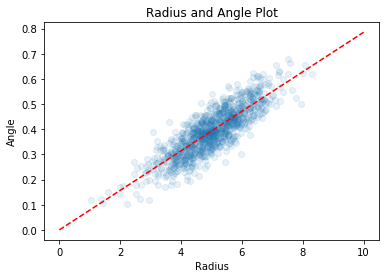

In [11]:
# r = np.random.uniform(0, 10, size=1000)
r = np.random.normal(5, 1, size=1000)
angle = r*(np.pi/4/10) + np.random.randn(1000)*0.05
# label = (angle>np.pi/4+np.random.randn(1000)*0.1).astype(int)
plt.scatter(r, angle, alpha=0.1)

plt.plot([0,10], [0,np.pi/4], 'r--')
plt.title('Radius and Angle Plot')
plt.xlabel('Radius')
plt.ylabel('Angle')

Text(0,0.5,'Y')

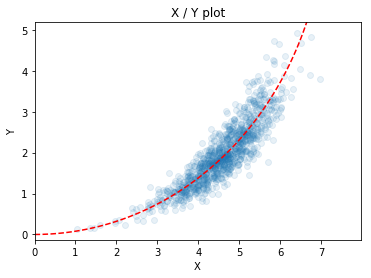

In [14]:
X = r * np.cos(angle)
y = r * np.sin(angle)

plt.scatter(X, y, alpha=0.1)
plt.axis('scaled')

r2 = np.arange(0,10,0.1)
angle2 = r2*np.pi/4/10

plt.plot(r2*np.cos(angle2), r2*np.sin(angle2), 'r--')

plt.title('X / Y plot')
plt.xlim(0, X.max()+1)
plt.xlabel('X')
plt.ylabel('Y')